In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn import linear_model, metrics
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [11]:
df = pd.read_csv('../../datasets/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [12]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [13]:
uid = {}
c = 0
for i in Counter(df.uid):
  uid[i] = c;
  c += 1
df["uid_num"] = [uid[df.uid[i]] for i in range(0, 77)]

scaller = StandardScaler()
X = df.drop(['uid', 'AVG(diff)'], axis=1).values
y = df['AVG(diff)']

scaller.fit(X, y)
X_scaled = scaller.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [14]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_scores = []
    test_scores = []
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    if isinstance(y, np.ndarray):
        y = pd.Series(y.flatten()) if y.ndim > 1 else pd.Series(y)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
        
        model.fit(X_train, y_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
        test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
        
        train_scores.append(train_rmse)
        test_scores.append(test_rmse)
        print(f'Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}')
    
    print(f'\nAverage Test RMSE: {np.mean(test_scores):.4f}')
    return train_scores, test_scores

In [15]:
lnr = linear_model.LinearRegression()
crossval(6, X_scaled, y, lnr)

Train RMSE: 37.7958 | Test RMSE: 57.8996
Train RMSE: 43.8935 | Test RMSE: 30.2707
Train RMSE: 40.1966 | Test RMSE: 48.7367
Train RMSE: 43.6954 | Test RMSE: 32.4842
Train RMSE: 43.1204 | Test RMSE: 35.7611
Train RMSE: 38.4772 | Test RMSE: 61.8207

Average Test RMSE: 44.4955


([37.79582904912706,
  43.89351901098032,
  40.19656671376729,
  43.695388827520496,
  43.12038214291339,
  38.47719709844887],
 [57.899612817577726,
  30.27066153860794,
  48.73672738192488,
  32.48424254636853,
  35.76111017693455,
  61.820723521454354])

In [16]:
dtr = DecisionTreeRegressor(random_state=21)
crossval(6, X_scaled, y, dtr)

Train RMSE: 0.0000 | Test RMSE: 50.9800
Train RMSE: 0.0000 | Test RMSE: 0.0000
Train RMSE: 0.0000 | Test RMSE: 58.8370
Train RMSE: 0.0000 | Test RMSE: 20.6550
Train RMSE: 0.0000 | Test RMSE: 33.9031
Train RMSE: 0.0000 | Test RMSE: 58.6572

Average Test RMSE: 37.1721


([0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [50.98004804965663,
  0.0,
  58.83701448496748,
  20.65499101539756,
  33.90308585909593,
  58.65724513994335])

In [17]:
rfr = RandomForestRegressor(random_state = 21)
crossval(6, X_scaled, y, rfr)

Train RMSE: 10.4841 | Test RMSE: 43.6356
Train RMSE: 13.9673 | Test RMSE: 0.0000
Train RMSE: 12.0919 | Test RMSE: 44.9214
Train RMSE: 12.7064 | Test RMSE: 30.8939
Train RMSE: 10.6754 | Test RMSE: 33.4439
Train RMSE: 13.1946 | Test RMSE: 38.4535

Average Test RMSE: 31.8914


([10.484083298372106,
  13.967344992368817,
  12.091905239074755,
  12.706418237736848,
  10.675408446599882,
  13.194590346111886],
 [43.63558806697643,
  0.0,
  44.921438848815455,
  30.89385892908029,
  33.443942058086044,
  38.45348272531394])

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

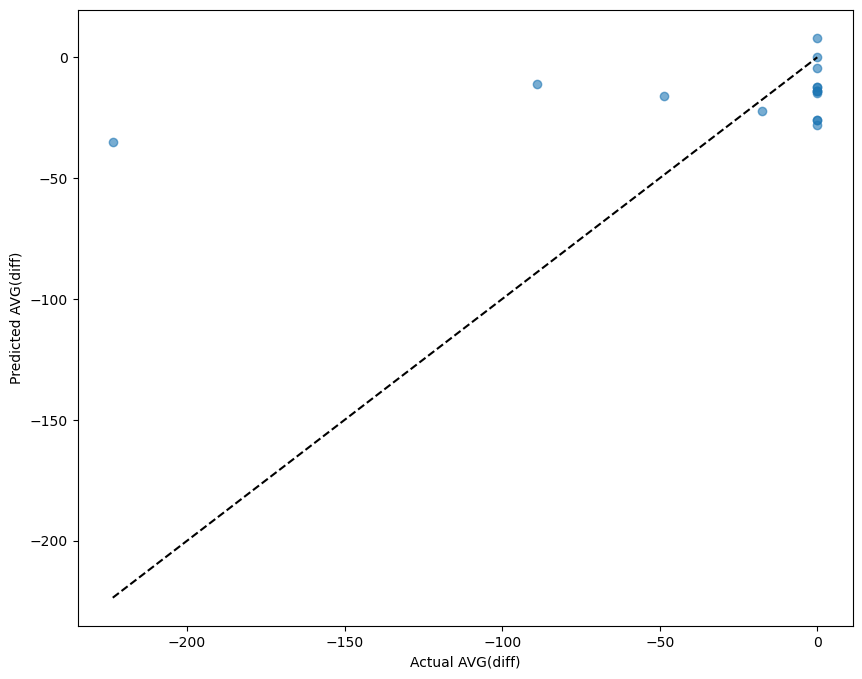

In [18]:
predict_lnr = lnr.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(x=y_test, y = predict_lnr, alpha=0.6)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.xlabel('Actual AVG(diff)')
plt.ylabel('Predicted AVG(diff)');

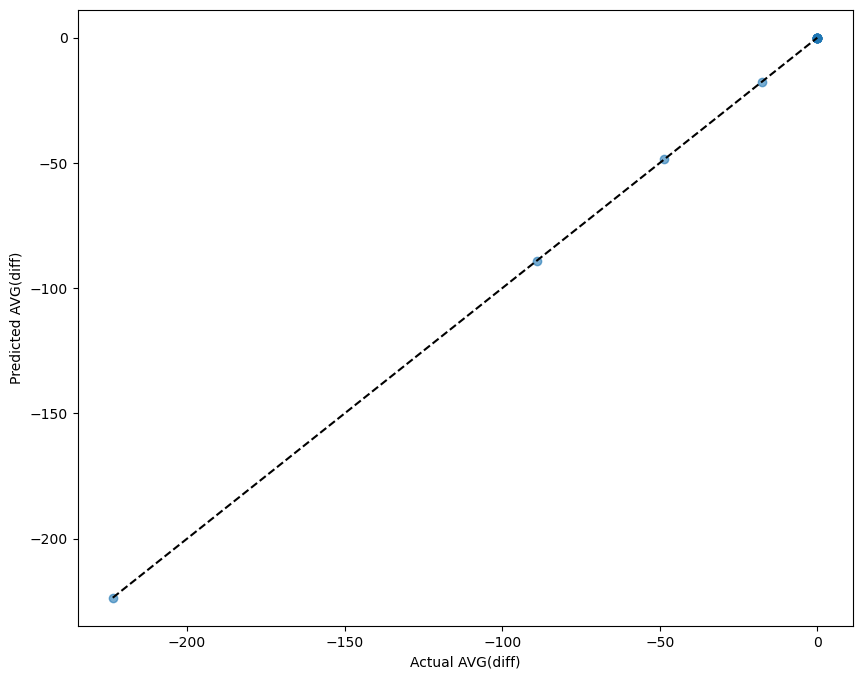

In [19]:
predict_dtr = dtr.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(x=y_test, y = predict_dtr, alpha=0.6)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.xlabel('Actual AVG(diff)')
plt.ylabel('Predicted AVG(diff)');

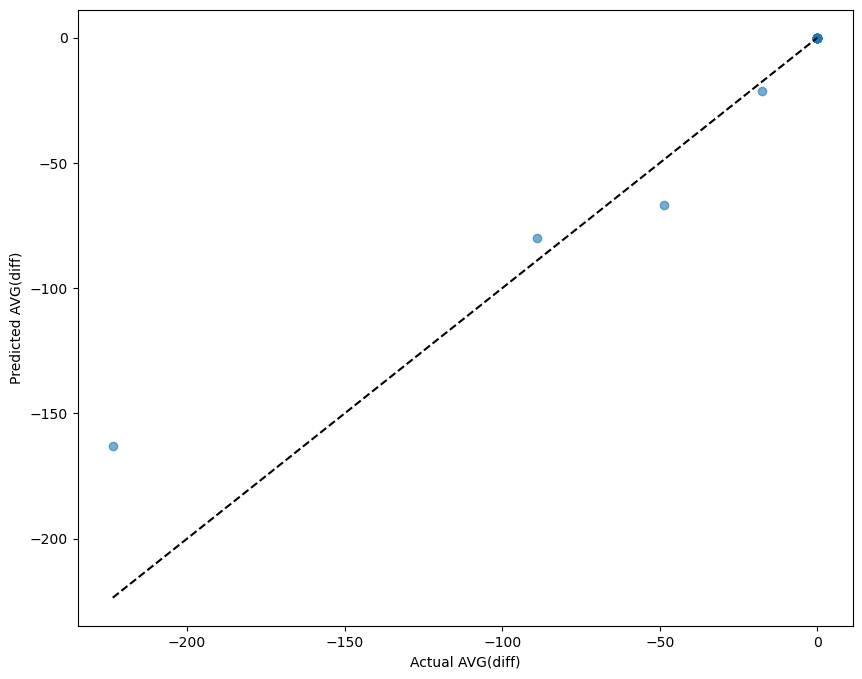

In [20]:
predict_rfr = rfr.predict(X_test)
xx = np.linspace(min(y_test),max(y_test))
plt.figure(figsize=(10,8))
plt.scatter(x=y_test, y = predict_rfr,alpha=0.6)
plt.plot(xx, xx, 'k--')
plt.xlabel('Actual AVG(diff)')
plt.ylabel('Predicted AVG(diff)');

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
 4   uid_num      77 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.1+ KB
